# Исследование игр, их закономерностей и причин, влияющих на общее число проданных копий

# Описание проекта

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед Нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Откроем файл с данными и изучим общую информацию. 

In [1]:
# Для начала импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Откроем датасет и сохраним в переменную 'data'
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# Выведем первые 20 строк
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Краткое описание каждого столбца**
- **Name** — название игры
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
# Приведем наименование столбцов в надлежащий вид (стиль snake_case)
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [5]:
data = data.apply(lambda x: x.str.lower() if(x.name not in ['rating', 'platform'] and x.dtype == 'object') else x)

In [6]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989.0,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,DS,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
# Выведем общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

In [8]:
# Найдем явные дубликаты
data.duplicated().sum()

0

In [9]:
data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre']).sum()

2

In [10]:
data.loc[data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre']) == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,madden nfl 13,PS3,2012.0,sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Если вторая строка не взывает к совести о рациональности своего удаления, то к первой у нас много вопросов. Посмотрим на эти строки

In [11]:
data.query('platform == "GEN" and year_of_release == 1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,shining force ii,GEN,1993.0,strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,super street fighter ii,GEN,1993.0,fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,ecco: the tides of time,GEN,1993.0,adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,street fighter ii': special champion edition (...,GEN,1993.0,action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,streets of rage 3,GEN,1993.0,action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,dynamite headdy,GEN,1993.0,platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,beyond oasis,GEN,1993.0,role-playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


С отфильтрованными данными для консоли "Sega Genesis" всего 9 подходящих строк. "Строками дубликатами" являются строки с индексами 659 и 14244, учитывая что львиная доля информации у той и другой отсутствует, можно придти к выводу, что это так и есть. Сохраним первую строку, так как информация о количестве проданных копий у нее больше 

In [12]:
data.query('name == "madden nfl 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,madden nfl 13,X360,2012.0,sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,madden nfl 13,PS3,2012.0,sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,madden nfl 13,Wii,2012.0,sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,madden nfl 13,PSV,2012.0,sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,madden nfl 13,WiiU,2012.0,sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,madden nfl 13,PS3,2012.0,sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Тут все видно явно, будем удалять второе вхождение строки-дубликата

In [13]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release', 'genre'], keep='first')

In [14]:
data.duplicated(subset=['name', 'platform', 'year_of_release', 'genre']).sum()

0

In [15]:
# Посчитаем количество пропусков
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Количество пропусков в некоторых столбцах занимает от 40% до 50%. Корректно заполнить их не получится, возможные решения: оставить их, либо установить заглушки с последующей фильтрацией при формировании выводов. Возможные причины возникновения: некорректная выгрузка датасета, неполнота/некорректность заполнения данных 

#### Предобработка данных в столбце 'name' и 'genre' 

In [16]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


Сразу видно, что два пропуска в столбце 'genre' соответствует пропускам в столбце 'name'. Удалим их

In [17]:
data = data.dropna(subset=['name']).reset_index(drop=True)

In [18]:
# Проверка
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [19]:
# Проверим количество игр с одинаковым названием
data['name'].value_counts().head(20)

need for speed: most wanted                12
madden nfl 07                               9
fifa 14                                     9
ratatouille                                 9
lego marvel super heroes                    9
lego jurassic world                         8
terraria                                    8
madden nfl 08                               8
lego the hobbit                             8
lego batman 3: beyond gotham                8
monopoly                                    8
lego star wars ii: the original trilogy     8
fifa 15                                     8
angry birds star wars                       8
lego harry potter: years 5-7                8
the lego movie videogame                    8
cars                                        8
fifa soccer 13                              8
harry potter and the sorcerer's stone       7
skylanders: trap team                       7
Name: name, dtype: int64

In [20]:
# Выведем строки с соответствующим названием
data.query('name == "need for speed: most wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,PS2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,PS3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1189,need for speed: most wanted,X360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1590,need for speed: most wanted,X360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1997,need for speed: most wanted,XB,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2047,need for speed: most wanted,PSV,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3580,need for speed: most wanted,GC,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5971,need for speed: most wanted,PC,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6272,need for speed: most wanted,WiiU,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6409,need for speed: most wanted,DS,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Как видно по таблице, это разные игры, выпущенные в разные годы, но имеющие схожее наименование. Возможно это ремейк или сиквел без номерной части, но исходя из возможности наличия таких строк корректно заполнить данные для других столбцов не представляется возможным

In [21]:
# Проверим столбец на наличие неявных дубликатов
data['genre'].value_counts()

action          3369
sports          2347
misc            1750
role-playing    1498
shooter         1323
adventure       1303
racing          1249
platform         888
simulation       873
fighting         849
strategy         683
puzzle           580
Name: genre, dtype: int64

Дубликаты отсутствуют

#### Предобработка данных в столбце 'year_of_release'

In [22]:
# Посмотрим на пропуски в столбце 'year_of_release'
data.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16370,pdc world championship darts 2008,PSP,NaN,sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16402,freaky flyers,GC,NaN,racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16445,inversion,PC,NaN,shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16455,hakuouki: shinsengumi kitan,PS3,NaN,adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Количество строк составляет 269 штук - это 1.6 % от всего датасета. Как было уазано выше, найти соответствующий год релиза для игр с одинаковыми названиями, но с разными датами релиза - будет трудно. Легче удалить, так и поступим

In [23]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [24]:
# Проверка
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [25]:
# Изменим тип данных
data['year_of_release'] = data['year_of_release'].astype('int64')

In [26]:
# Проверка
data['year_of_release'].dtype

dtype('int64')

#### Предобработка данных в столбце 'user_score'

In [27]:
# Отобразим уникальные значения в интересующем столбце
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

`TBD(tbd)` - это To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода", когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, в нашем же случае это связано с оценкой игроков. Посмотрим на эти строки

In [28]:
data.query('user_score == "tbd"').sort_values(by='year_of_release', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14900,rugby challenge 3,X360,2016,sports,0.00,0.02,0.00,0.00,NaN,tbd,E
9651,destiny: the collection,XOne,2016,shooter,0.05,0.06,0.00,0.01,NaN,tbd,T
13226,just dance 2017,PS3,2016,misc,0.01,0.03,0.00,0.01,NaN,tbd,E10+
16005,the book of unwritten tales 2,WiiU,2016,adventure,0.00,0.01,0.00,0.00,NaN,tbd,T
15986,azure striker gunvolt: striker pack,3DS,2016,action,0.00,0.00,0.01,0.00,NaN,tbd,T
...,...,...,...,...,...,...,...,...,...,...,...
4165,razor freestyle scooter,PS,1999,sports,0.26,0.17,0.00,0.03,65.0,tbd,E
870,who wants to be a millionaire,PC,1999,misc,1.94,0.00,0.00,0.00,NaN,tbd,E
14931,raycrisis: series termination,PS,1999,shooter,0.01,0.01,0.00,0.00,67.0,tbd,E
2206,snocross championship racing,PS,1999,racing,0.52,0.35,0.00,0.06,66.0,tbd,E


Как видно по таблице, это возможная некорректность в данных или возникшая ошибка; есть строки, в которых год релиза указан 1997

In [29]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)

In [30]:
# Проверка
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [31]:
# Изменим тип данных
data['user_score'] = data['user_score'].astype(float)

In [32]:
# Проверка
data['user_score'].dtype

dtype('float64')

#### Посмотрим на столбец 'rating' 

In [33]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Краткое пояснение по буквенным обозначениям рейтинга:**
- **«EC»** («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. 

- **«K-A/E»** («Everyone») — «Для всех»: До 1998 года этот рейтинг назывался Дети для взрослых (КА). Содержание вполне подходит для возрастной категории старше 6 лет; такие игры могут понравиться и взрослым. 

- **«E10+»** («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены. 

- **«T»** («Teen») — «Подросткам 13—19 лет»: Игра подходит для подростков старше 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 

- **«M»** («Mature») — «От 17 лет»: Материалы игры не подходят для возрастной категории младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. 

- **«AO»** («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. 

- **«RP»** ( «Rating Pending»») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоение рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

Как видно по уникальным обозначениям рейтинга у нас 2 значения для одной и той же группы(**K-A** И **E**). Абривиатура **K-A** использовалась до 1998 года, после была заменена на **E** - так мы и поступим.

In [34]:
data.loc[data['rating'] == "K-A", 'rating'] = 'E'

In [35]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

<a id='rating'></a>

Рейтинг, представленный в данном датасете, от организации ESRB (англ. Entertainment Software Rating Board), преимущественно используется в США, Канаде и Мексике. В Великобритании и большинстве европейских стран - система PEGI (Европейская система классификации игр). Что касается пропущенных значений(nan), то есть вероятность, что игры были изданы за пределами вышеупомянутых стран, например Япония(jp_sales), у которой своя система оценивания (организация CERO-Computer Entertainment Rating Organization), или же некорректности при выгрузке датасета. 

In [36]:
data.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16438,samurai warriors: sanada maru,PS3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16439,lma manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16440,haitaka no psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16441,spirits & spells,GBA,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Больше 6000 строк, заполним эти пропуски 0-м значением, так как такие некорректности могут быть связаны с играми, получившие рейтинг от других организаций 

In [37]:
data['rating'] = data['rating'].fillna('unknown rating')

In [38]:
data['rating'].value_counts()

unknown rating    6676
E                 3923
T                 2905
M                 1536
E10+              1393
EC                   8
AO                   1
RP                   1
Name: rating, dtype: int64

Строк с значениями рейтингов: **EC**, **RP** и **AO** всего 10 штук, такое маленькое количество никак не повлияет на результаты исследования и от этих строк можно избавиться

In [39]:
data = data.query('rating != ["EC", "RP", "AO"]').reset_index(drop=True)

In [40]:
data['rating'].value_counts()

unknown rating    6676
E                 3923
T                 2905
M                 1536
E10+              1393
Name: rating, dtype: int64

#### Создание нового столбца 'total_sales' с суммой продаж во всем мире, в млн проданных копий

In [41]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [42]:
data.head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown rating,40.24
2,mario kart wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown rating,31.38
5,tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown rating,30.26
6,new super mario bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,Wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,Wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown rating,28.31


In [43]:
data.duplicated().sum()

0

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16433 entries, 0 to 16432
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16433 non-null  object 
 1   platform         16433 non-null  object 
 2   year_of_release  16433 non-null  int64  
 3   genre            16433 non-null  object 
 4   na_sales         16433 non-null  float64
 5   eu_sales         16433 non-null  float64
 6   jp_sales         16433 non-null  float64
 7   other_sales      16433 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7459 non-null   float64
 10  rating           16433 non-null  object 
 11  total_sales      16433 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Как видно по выведенной информации, мы удалили почти 1,7 % - это допустимые значения, также выполнили предобработку данных на устранение некорректных значений и неявных дупликатов, перевели типы данных в столбцах в соответствии со значениями. Можно приступать к следующему шагу

### Исследовательский анализ данных

#### Посмотрим, сколько игр выпускалось в разные годы

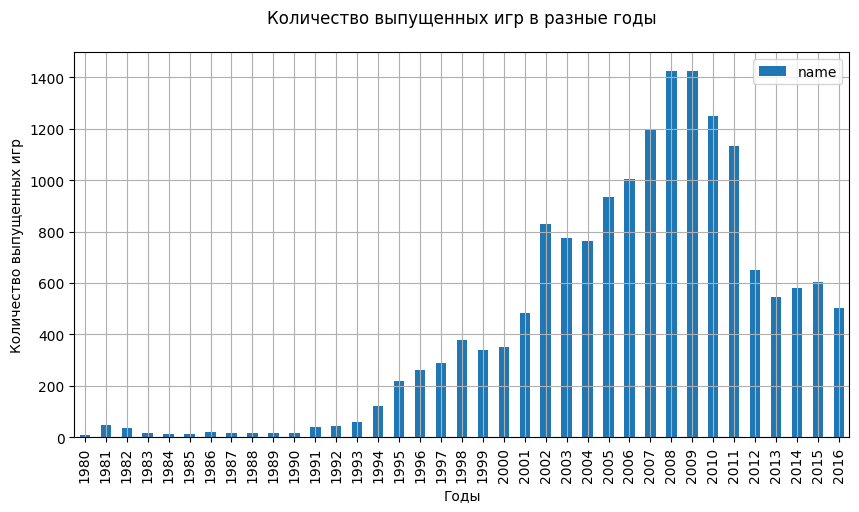

In [45]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', grid=True, 
                                                                               figsize=(10, 5))
plt.title('Количество выпущенных игр в разные годы\n')
plt.xlabel('Годы')
plt.ylabel('Количество выпущенных игр');

Как видно на графике, в 80-90-е годы продажи и, соответственно, выпуск игр были на низком уровне, обусловленные низким распространением игровых консолей (удовольствие было не из дешевых) и малочисленностью издателей-разработчиков. Со временем, с распространением игровых платформ и персональных компьютеров, количество продаваемых игр увеличивалось. С 1998 года идет бурный рост как в плане развития технологий и их внедрения для будующих игровых приставок/персональных компьютеров, так и в разработке и издательстве игр. Пиком на данной столбчатой диаграмме можно признать период с 2008 по 2009 годы - было выпущено больше 1400 игр. Заметный спад приходится на период с 2012 по 2016 годы, и это обсуловлено последствиями кризиса в 2008 году, после которого многие студии закрывались, издатели были вынуждены продаваться за копейки, а компании, оставшиеся на плаву оптимизировали затраты и не позволяли себе экспериментировать на игровом продукте - выпускались только проверенные тайтлы.

In [46]:
# Выберем период после 2000 года
data_relevant = data.query('year_of_release > 2000')

#### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы.

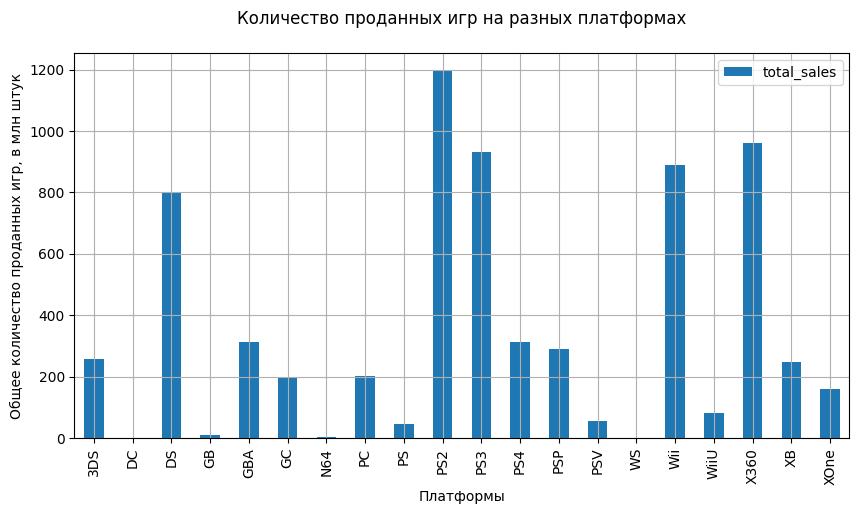

In [47]:
data_relevant.pivot_table(index='platform', values='total_sales', aggfunc='sum').plot(kind='bar', grid=True, 
                                                                                      figsize=(10, 5))
plt.title('Количество проданных игр на разных платформах\n')
plt.xlabel('Платформы')
plt.ylabel('Общее количество проданных игр, в млн штук');

Как видно по диаграмме лидерами являются платформы: `DS`, `PS2`, `PS3`, `Wii`, `X360`, но нужно уточнить, что это предыдущее поколение консолей, поэтому и цифры по продажам соответствующие. Новое поколение только набирает обороты и не включать его - это ошибка: `WiiU`, `3DS`, `PS4`, `PSV`, `XOne`, а также нужно взять самую проверенную и консервативную плтаформу - `PC`   

In [48]:
p_list = ['DS', 'PS2', 'PS3', 'Wii', 'PSP', 'X360', 'WiiU', '3DS', 'PSV', 'PS4', 'XOne', 'PC']
data_relevant = data_relevant.query('platform in @p_list')

In [49]:
data_relevant['platform'].value_counts()

DS      2118
PS2     2044
PS3     1305
Wii     1284
X360    1232
PSP     1193
PC       907
3DS      512
PSV      429
PS4      392
XOne     247
WiiU     147
Name: platform, dtype: int64

Выбрав платформы, мы  рассмотрим их распределение по годам

In [50]:
data_relevant_pivot = data_relevant.pivot_table(index='platform',columns='year_of_release', values='total_sales', 
                                                aggfunc='sum')
data_relevant_pivot

year_of_release,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.34,85.02,25.73,11.01,1.54,NaN,NaN,NaN
PC,5.47,8.57,8.84,10.39,4.37,2.85,9.28,12.42,16.91,24.19,34.99,23.22,12.38,13.28,8.52,5.25
PS2,166.43,205.38,184.31,211.81,160.42,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,20.96,73.19,118.52,130.93,142.17,156.78,107.35,113.25,47.76,16.82,3.60
PS4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.99,100.00,118.90,69.25
PSP,NaN,NaN,NaN,7.06,43.84,55.32,46.93,34.55,37.78,35.04,17.82,7.69,3.14,0.24,0.12,NaN
PSV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.63,16.19,10.59,11.90,6.25,4.25
Wii,NaN,NaN,NaN,NaN,NaN,137.15,152.77,171.32,206.97,127.29,59.65,21.71,8.59,3.75,1.14,0.18


Как видно по таблице, можно найти закономерность в суммарных продажах игр: на выходе новой консоли продажи игр имеют не самый высокий показатель, с течением консольного жизненного цикла продажи увеличиваются и достигают пиковых значений, а с анонсом и выпуском нового поколения начинают терять объемы продаж. Что касается платформы `PC`, то она устойчива к изменениям в догосрочной перспективе, спады и подъемы характерны для нее, опять таки, с выходом игровых платформ, но она стабильно возвращается к медианным значениям для своей категории  

In [51]:
data.query('platform == "DS" and year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15694,strongest tokyo university shogi ds,DS,1985,action,0.0,0.0,0.02,0.0,NaN,NaN,unknown rating,0.02


In [52]:
data.loc[data['name'] == "strongest tokyo university shogi ds", 'year_of_release'] = 2010

In [53]:
data.query('name == "strongest tokyo university shogi ds"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15694,strongest tokyo university shogi ds,DS,2010,action,0.0,0.0,0.02,0.0,NaN,NaN,unknown rating,0.02


In [54]:
stop_list = ['3DS', 'PS4', 'XOne', 'PC', 'PSV', 'WiiU']
life_cycle_platform = data.groupby('platform')['year_of_release'].unique().transform(len)
platform_median = life_cycle_platform.loc[(life_cycle_platform.values >= 5) & 
                                          (~life_cycle_platform.index.isin(stop_list))].median()
print('Медиана жизненного цикла платформ:', platform_median)

Медиана жизненного цикла платформ: 10.0


Жизненный цикл консолей составляет 10 лет. Это не соответствует информации в сети интернет равной 5-7 годам. 

#### Возьмем данные за соответствующий актуальный период, которые помогут построить прогноз на 2017 год.

Самым верным решением будет взять данные за 3 года, включительно неполный 2016 год

In [55]:
data_relevant = data_relevant.query('year_of_release > 2013')

In [56]:
data_relevant['year_of_release'].sort_values()

5169     2014
6522     2014
16019    2014
6571     2014
12300    2014
         ... 
12180    2016
12185    2016
12189    2016
11701    2016
16432    2016
Name: year_of_release, Length: 1689, dtype: int64

#### Рассмотрим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

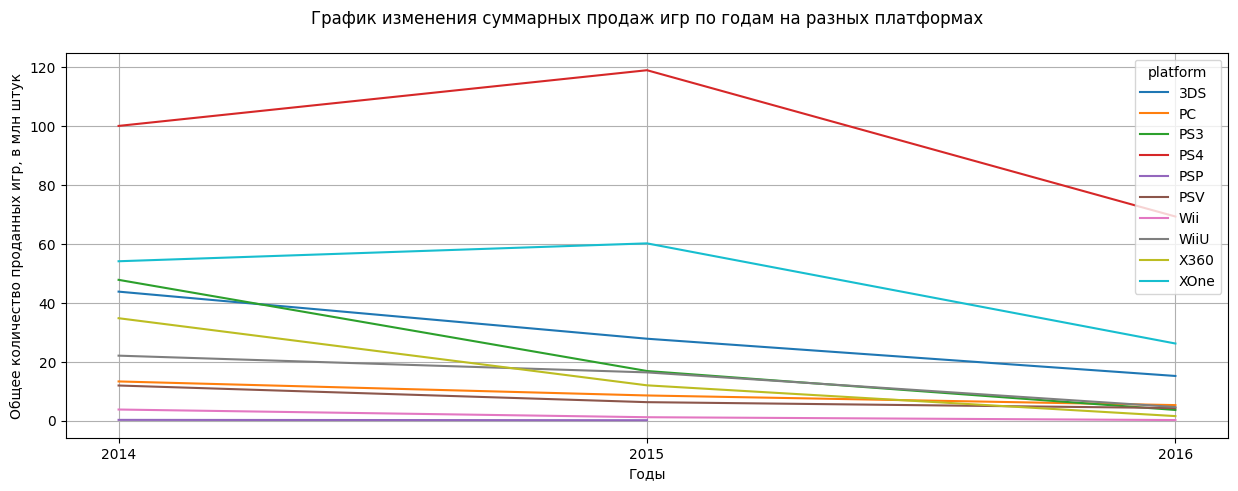

In [57]:
(data_relevant.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
 .plot(grid=True, figsize=(15, 5)))
plt.title('График изменения суммарных продаж игр по годам на разных платформах\n')
plt.xlabel('Годы')
plt.ylabel('Общее количество проданных игр, в млн штук')
plt.xticks(np.arange(2014, 2017, 1));

В начале 2012 года платформами-лидерами были `PS3`, `X360`, `3DS`. С началом выпуска новой линейки консолей от компаний-производителей (**Microsoft**, **Sony**, **Nintendo**) в лице `PS4`, `XOne` и `3DS`(была выпущена в 2011 году) с 2013 года они начали набирать популярность и в 2014 году лидерами в продажах стали именно эти платформы. Количество проданных игр для предыдущих поколений консолей, соответственно, уменьшалось, ввиду перехода старых пользователей на новую платформу, либо прекращением поддержкой старого поколения со стороны компании-производителя. Платформа `PC` имеет стабильную форму графика; небольшое проседание заметно к 2013 году, опять таки, вызванного выпуском нового поколения консолей.

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [58]:
# Сделаем сводную по суммарным продажам игр по платформама
data_sales = (data_relevant.pivot_table(index='platform', values='total_sales', aggfunc='sum')
.sort_values(by='total_sales', ascending=False))
data_sales

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


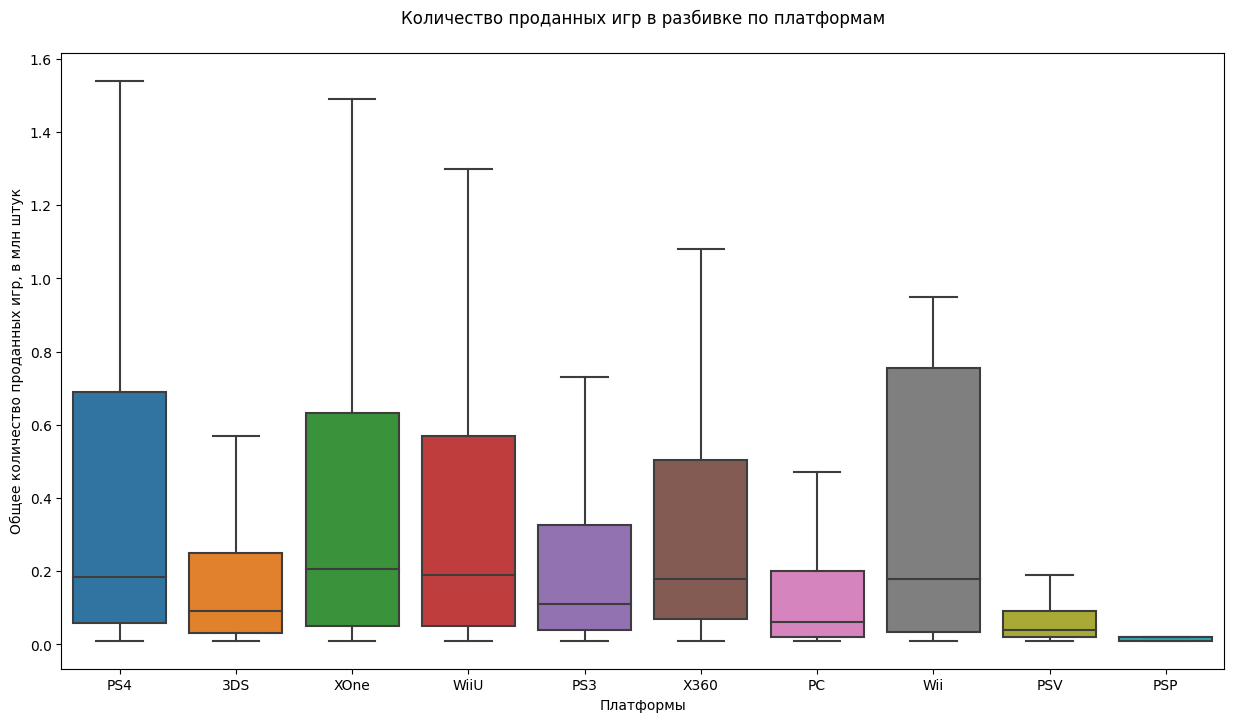

In [59]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=data_relevant, x='platform', y='total_sales', showfliers=False)
plt.title('Количество проданных игр в разбивке по платформам\n')
ax.set_xlabel('Платформы')
ax.set_ylabel('Общее количество проданных игр, в млн штук')
plt.show()

Как видно на графике и сводной таблице, лидером в количестве проданных игр с 2014 года по актуальный является `PS4`. Медианное значение для этой платформы равно 185 000 проданных копий, а максимальное значение равно 14 630 000 копий.  
Для `XOne` медианное значение соствляет 205 000 проданных копий, а максимальное значение - 7 390 000 копий; `3DS`, медиана - 90 000 проданных копий, максимальное значение - 11 680 000 копий. Для `PS3` медиана равна 110 000 копий, максимальное значение - 5 270 000. У `PC`, медиана - 60 000, max - 3 050 000

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Выберем самую популярную платформу - `PS4`

In [60]:
data_score = data_relevant.query('platform == "PS4"')[['user_score', 'critic_score', 'total_sales']]

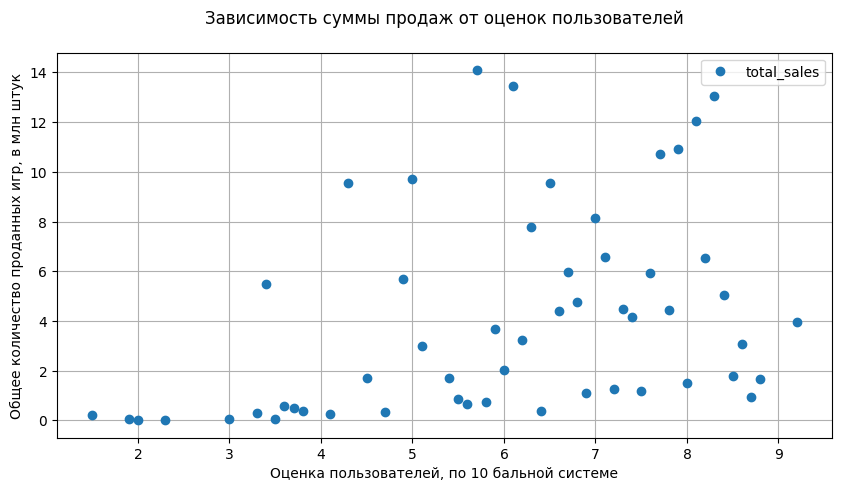

Коэффициент корреляции: -0.04013158947269733


In [61]:
data_score.pivot_table(index='user_score', values='total_sales', aggfunc='sum').plot(grid=True, style='o', 
                                                                                     figsize=(10, 5))
plt.title('Зависимость суммы продаж от оценок пользователей\n')
plt.xlabel('Оценка пользователей, по 10 бальной системе')
plt.ylabel('Общее количество проданных игр, в млн штук');
plt.show()
print('Коэффициент корреляции:', data_score['user_score'].corr(data_score['total_sales']))

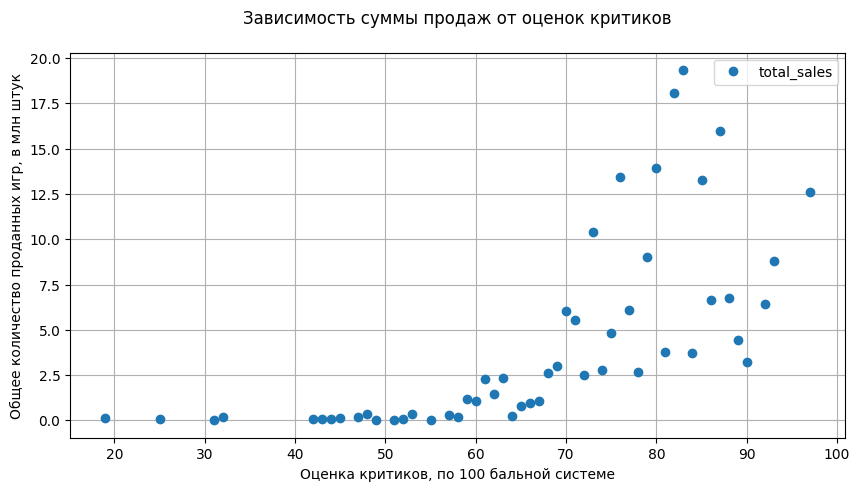

Коэффициент корреляции: 0.4026614106810409


In [62]:
data_score.pivot_table(index='critic_score', values='total_sales', aggfunc='sum').plot(grid=True, style='o', 
                                                                                       figsize=(10, 5))
plt.title('Зависимость суммы продаж от оценок критиков\n')
plt.xlabel('Оценка критиков, по 100 бальной системе')
plt.ylabel('Общее количество проданных игр, в млн штук');
plt.show()
print('Коэффициент корреляции:', data_score['critic_score'].corr(data_score['total_sales']))

Как видно на графиках и по подсчитанным значениям корреляции, оценки пользователей не влияют на продажи; для платформы `PS4` коэффициент корреляции равен -0.03 - абсолютное отсутствие взаимосвязи двух параметров. Что касается оценок от критиков, то тут ситуация в разы лучше и коэффициент корреляции равен 0.4 - прямолинейная взаимосвязь отсутствует, но это хороший показатель. Для игр, набравших 70 баллов от критиков и выше прослеживаются хорошие продажи.  

#### Соотнесем выводы с продажами игр на других платформах.

In [63]:
def score_corr(data, column_1, column_2, iterration_value, iterration_column):
    for value in iterration_value:
        for type in column_1:
            data_platform = data.loc[data[iterration_column] == value]
            data_pivot = data_platform.pivot_table(index=type, values=column_2, aggfunc='sum')
            data_pivot.plot(grid=True, style='o', figsize=(10, 5))
            x_label = ('Оценка пользователей, по 10 бальной системе' if type == 'user_score' 
                       else 'Оценка критиков, по 100 бальной системе')
            title = ('Зависимость суммы продаж от оценок пользователей' if type == 'user_score' 
                     else 'Зависимость суммы продаж от оценок критиков') 
            plt.title(f'{title}, {value}')
            plt.xlabel(x_label)
            plt.ylabel('Общее количество проданных игр, в млн штук');
            plt.show()
            print('Коэффициент корреляции:', data_platform[type].corr(data_platform[column_2]))

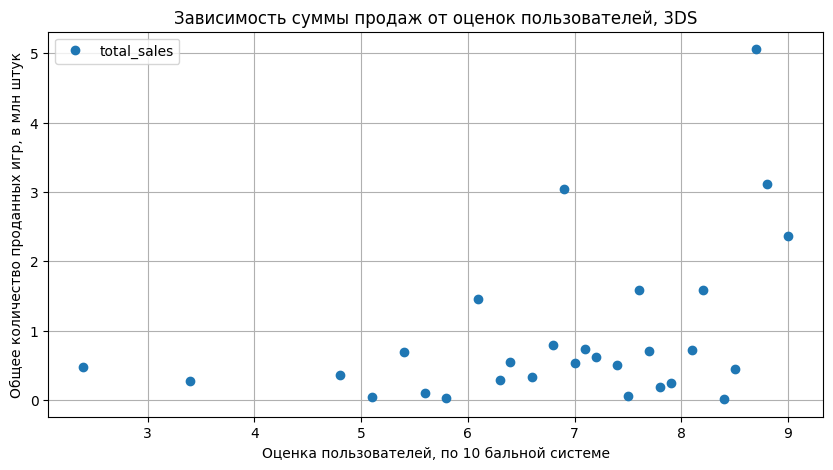

Коэффициент корреляции: 0.2151932718527028


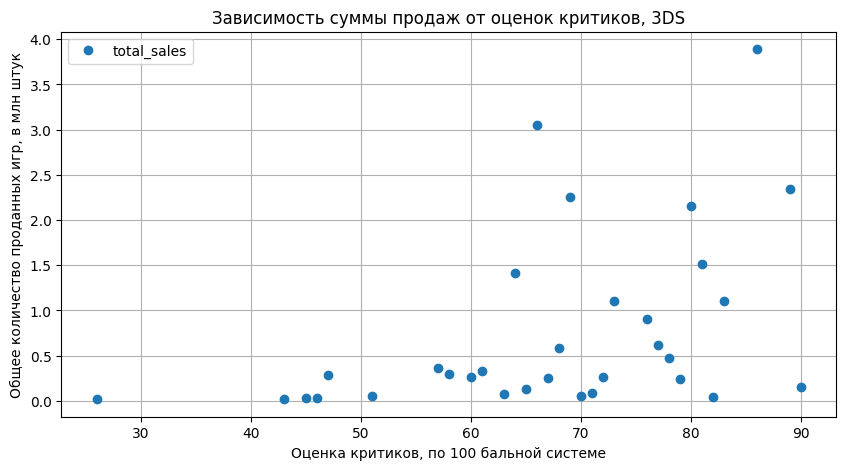

Коэффициент корреляции: 0.314117492869051


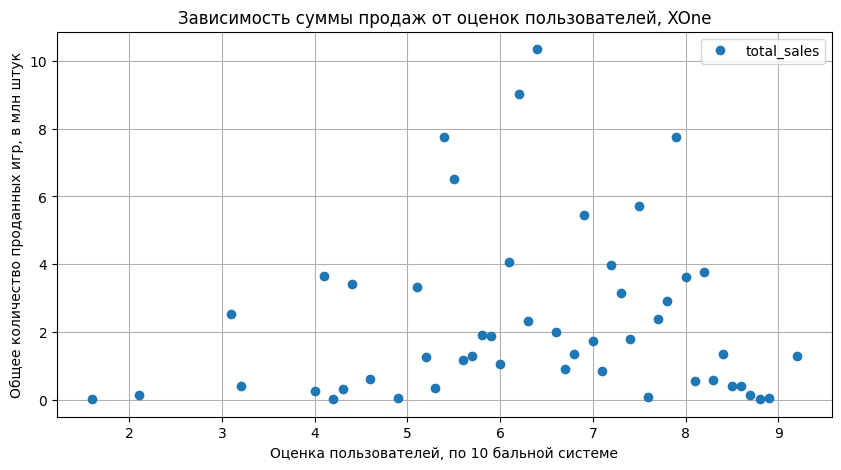

Коэффициент корреляции: -0.07038392806475809


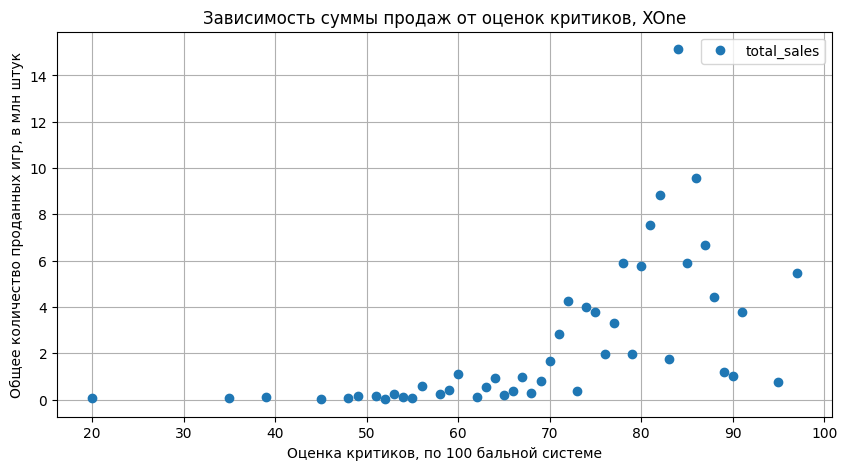

Коэффициент корреляции: 0.42867694370333187


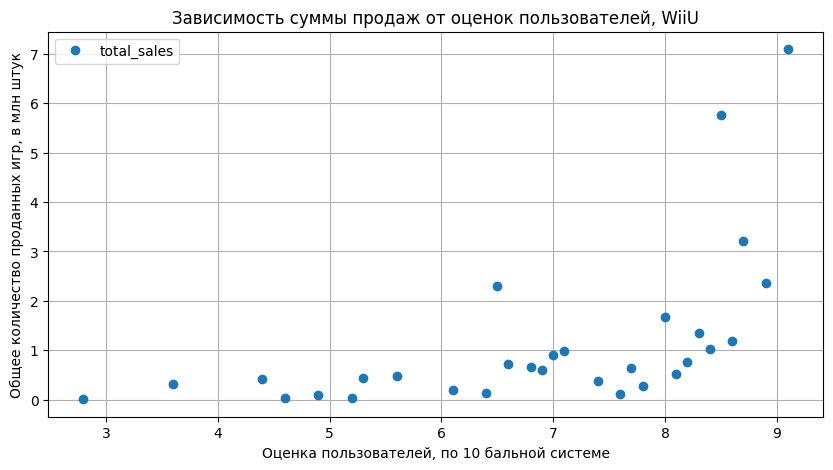

Коэффициент корреляции: 0.40792645792170773


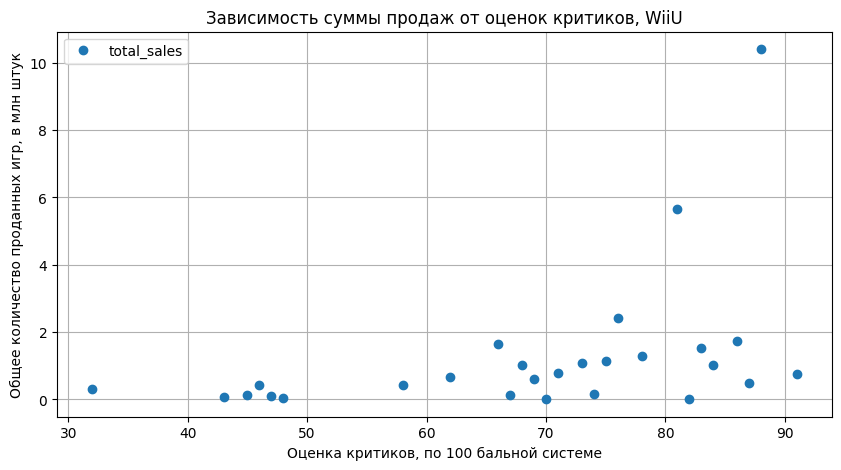

Коэффициент корреляции: 0.370201412480884


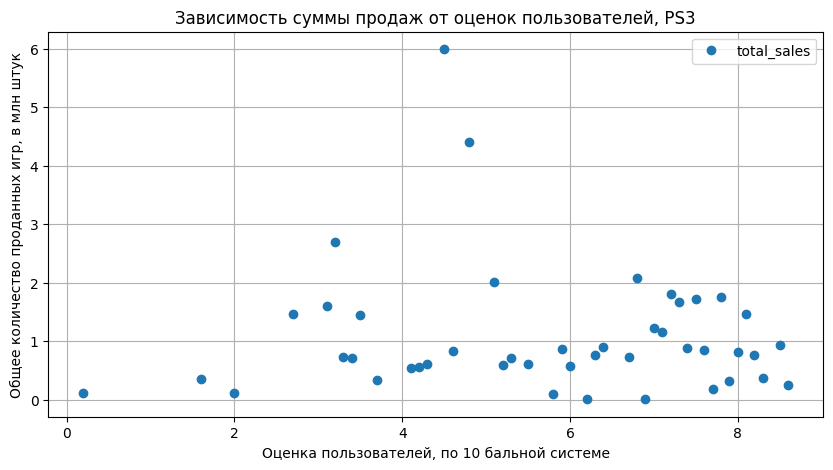

Коэффициент корреляции: -0.16676141347662118


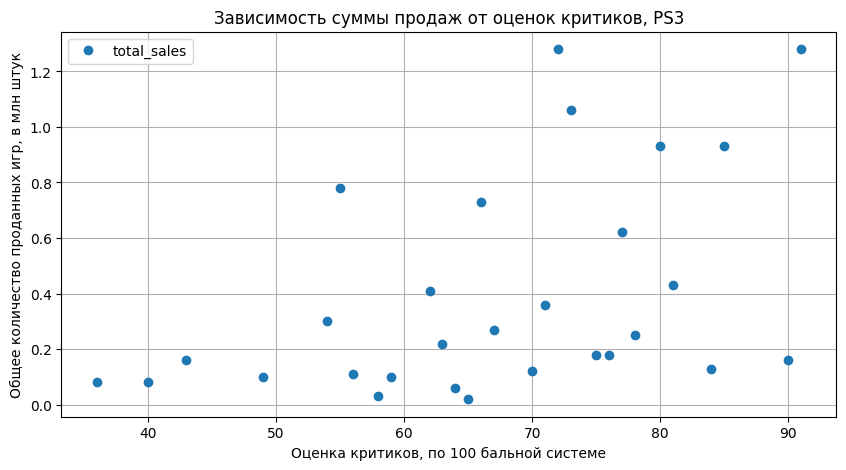

Коэффициент корреляции: 0.44657460493190704


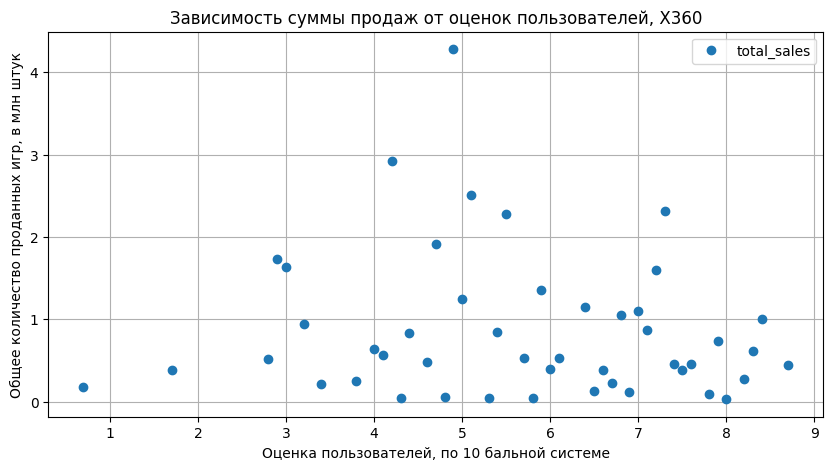

Коэффициент корреляции: -0.138444570945665


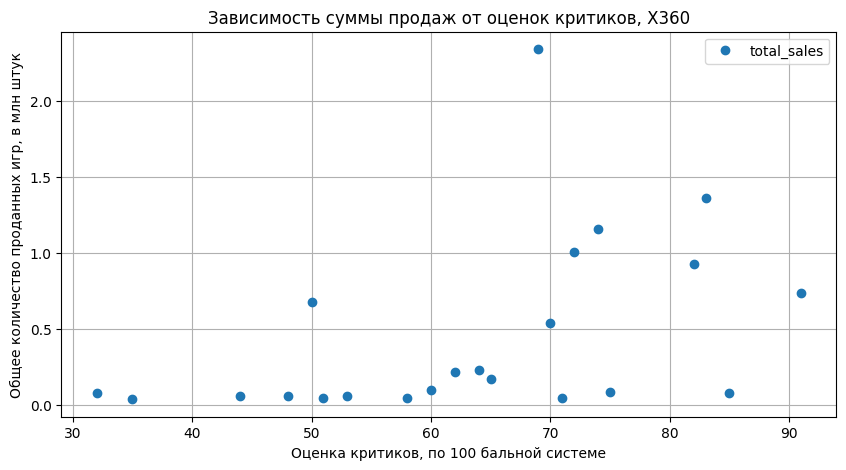

Коэффициент корреляции: 0.5257228356581523


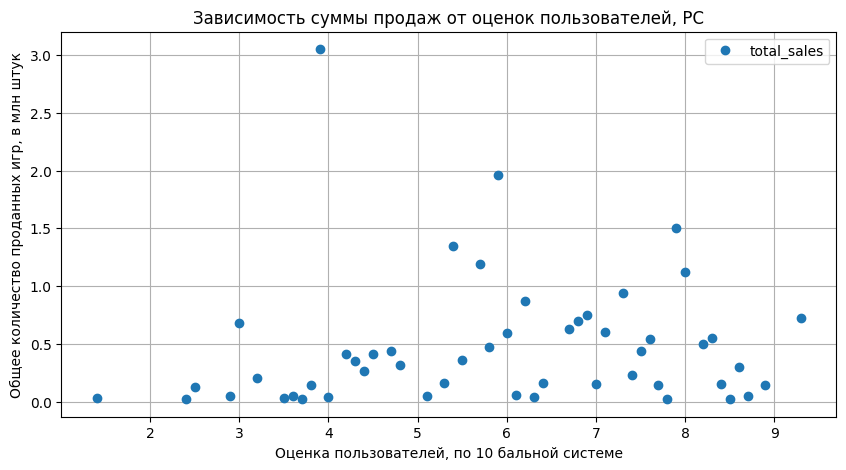

Коэффициент корреляции: -0.07159665703472451


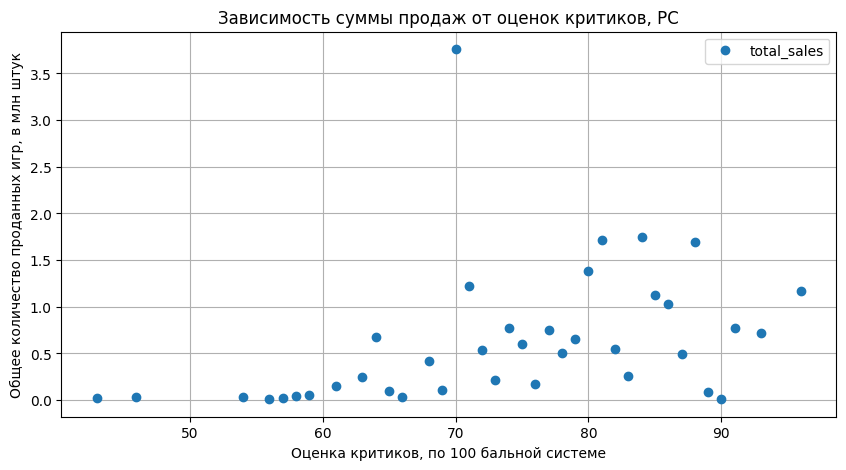

Коэффициент корреляции: 0.17463413769350036


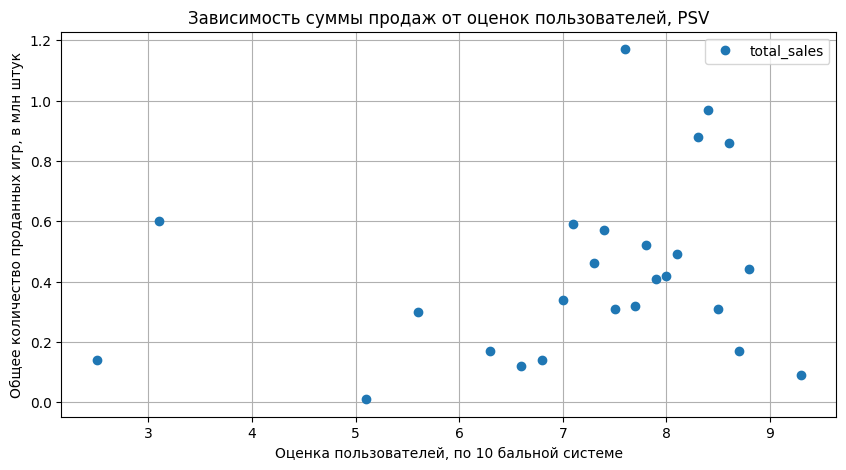

Коэффициент корреляции: -0.16845504978064446


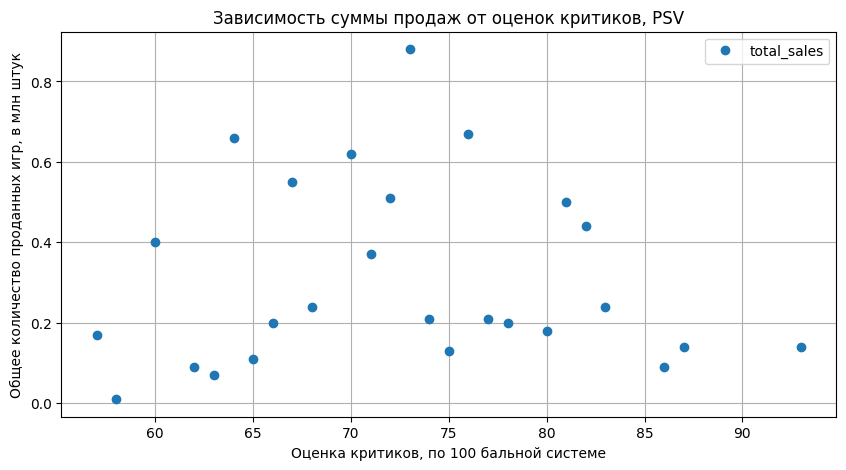

Коэффициент корреляции: 0.04266490657009526


In [64]:
platform_list = data_relevant.query('platform != ["Wii", "PSP", "PS4"]')['platform'].unique() 
type_score = ['user_score', 'critic_score']
score_corr(data_relevant, type_score, 'total_sales', platform_list, 'platform')

Такая же картина просматривается и на других платформах, оценки пользователей не влияют на продажи, а к оценкам критиков прислушиваются при покупке. Возможно это связано с тем, что потенциальный покупатель (геймер) не доверяет или сомневается в экспертности мнения от других пользователей (игроков) и прислушивается к мнению журналистов, экспертов от игровых изданий, рассчитывая на объективную оценку игрового продукта 

#### Посмотрим на общее распределение игр по жанрам. Выделим жанры с высокими и низкими продажами

In [65]:
data_genre = data_relevant.pivot_table(index='genre', values='total_sales', aggfunc='count')
data_genre.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
action,619
role-playing,221
adventure,185
sports,161
shooter,128
misc,113
racing,69
fighting,60
simulation,44


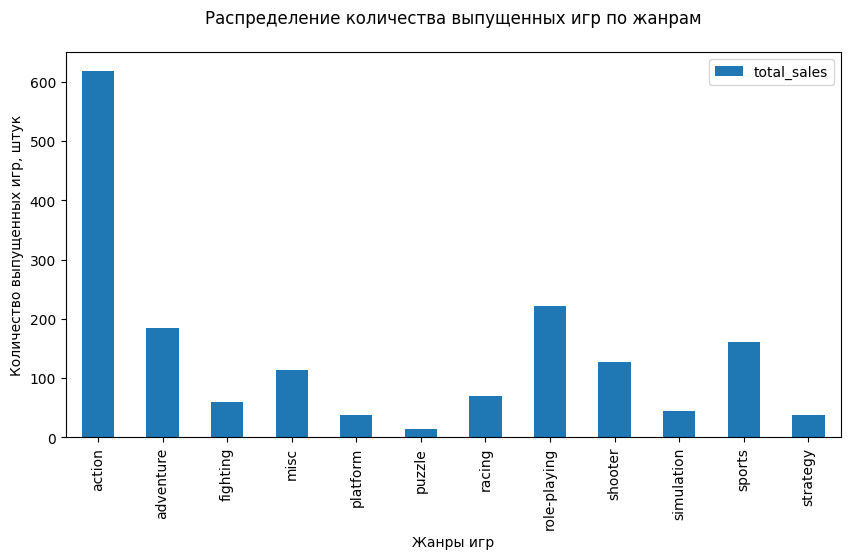

In [66]:
data_genre.plot(kind='bar', figsize=(10, 5))
plt.title('Распределение количества выпущенных игр по жанрам\n')
plt.xlabel('Жанры игр')
plt.ylabel('Количество выпущенных игр, штук');

Лидером жанра по количеству выпущенных игр является 'Action' - более 600 игр, также в топ-5 можно отнести: 'Role-Playing' (232), 'Sports' (176), 'Shooter' (172) и 'Adventure' (134)

In [67]:
data_genre_median = data_relevant.pivot_table(index='genre', values='total_sales', aggfunc='median')
data_genre_median.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
shooter,0.515
sports,0.180
platform,0.140
fighting,0.125
role-playing,0.110
simulation,0.100
action,0.090
misc,0.090
racing,0.090


Построим диаграмму размаха для более детального рассмотрения распределения игр по жанрам

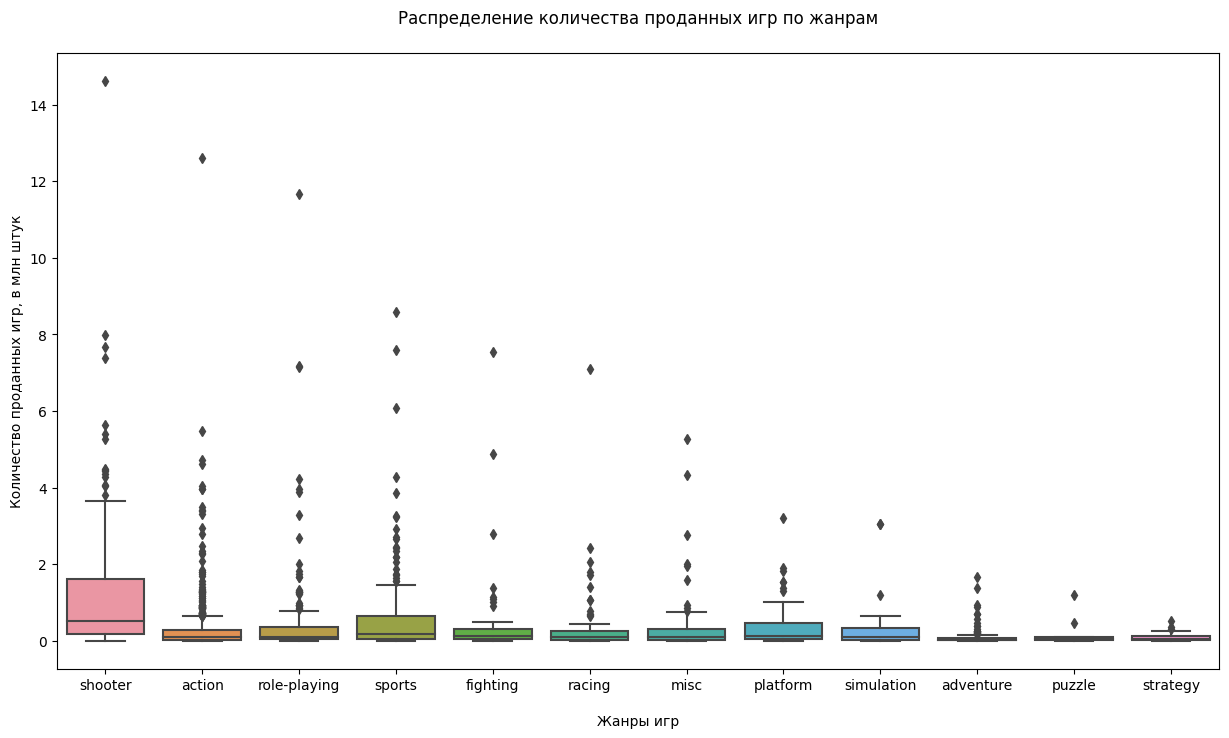

In [68]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=data_relevant, x='genre', y='total_sales')
plt.title('Распределение количества проданных игр по жанрам\n')
ax.set_xlabel('\nЖанры игр')
ax.set_ylabel('Количество проданных игр, в млн штук')
plt.show()

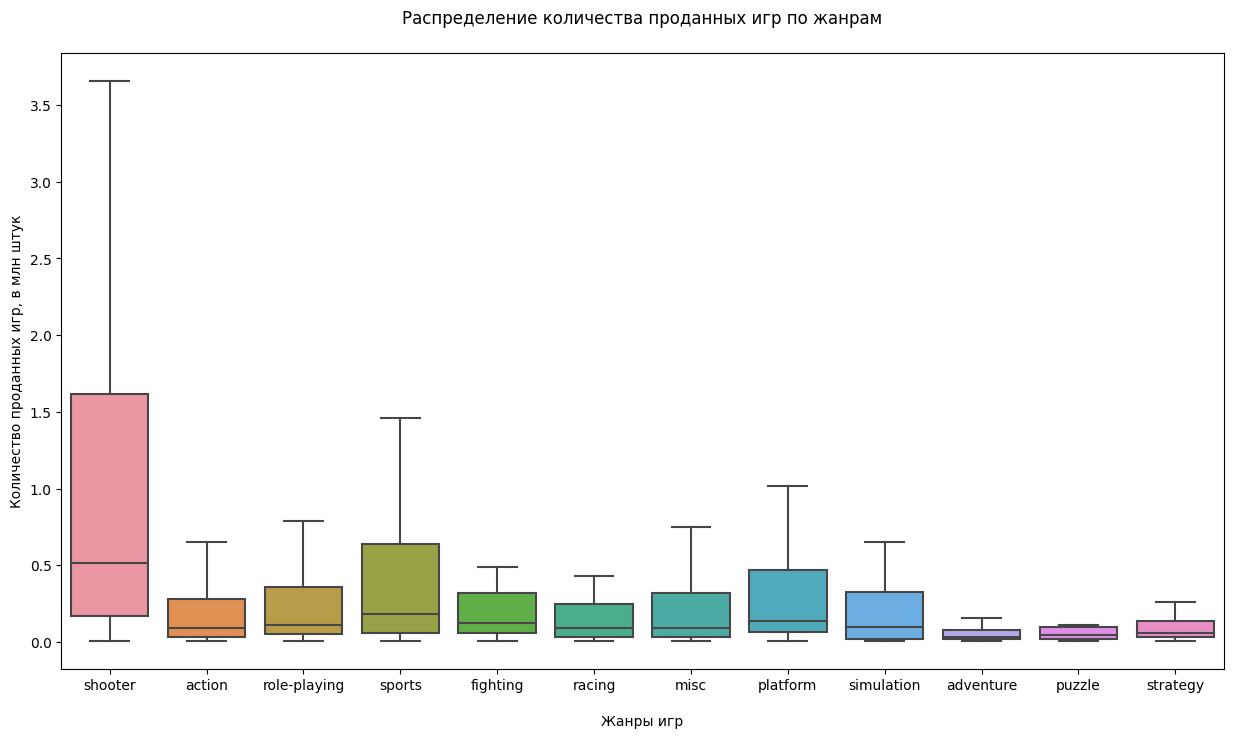

In [69]:
fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=data_relevant, x='genre', y='total_sales', showfliers=False)
plt.title('Распределение количества проданных игр по жанрам\n')
ax.set_xlabel('\nЖанры игр')
ax.set_ylabel('Количество проданных игр, в млн штук')
plt.show()

Как видим, лидером являются игры в жанре 'Shooter' медианное значение равно 515 000 проданных копий, также в топ-5 можно отнести: 'Sports'(медиана - 180 000 копий), 'Platform'(медиана - 140 000 копий), 'Fighting'(медиана - 125 000 копий), 'Role-Playing'(медиана - 110 000 копий), далее идут 'Simulation'(медиана - 100 000 копий) и 'Action'(медиана - 90 000 копий) занимает 7 позицию  в таблице, несмотря на большое количество выпущенных игр. Все эти данные стоит учесть при формировании дальнейших закупок, рекламных компаний и, соответственно, реализации товаров для нашего интернет-магазина.

### Составим портрет пользователя для каждого региона 

**Напишем вопросы, на которые нам нужно ответить**

**Определите для пользователя каждого региона (NA, EU, JP):**
- **Самые популярные платформы (топ-5). Описать различия в долях продаж.**
- **Самые популярные жанры (топ-5). Пояснить разницу.**
- **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [70]:
user_region = ['na_sales', 'eu_sales', 'jp_sales']

#### Самые популярные платформы (топ-5). Описать различия в долях продаж.

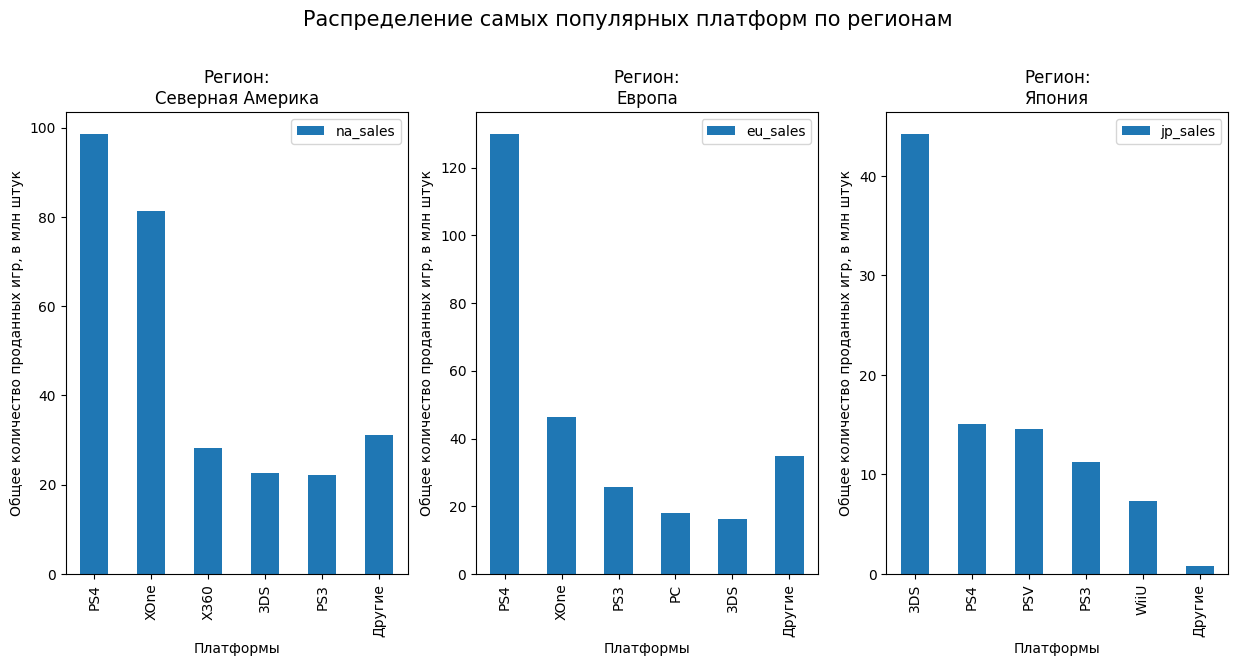

In [71]:
num = 0
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f'Распределение самых популярных платформ по регионам', y = 1.05, fontsize=15)
for region in data_relevant[user_region]:
    top_platforms = (data_relevant.pivot_table(index='platform', values=region, aggfunc='sum')
                              .sort_values(by=region, ascending=False)
                              .head(5)).reset_index()
    
    other = data_relevant[region].sum() - top_platforms[region].sum()
    all_platforms = top_platforms.append({'platform': 'Другие', region: other}, ignore_index=True)
    
    all_platforms.plot(kind='bar', ax=ax[num])
    title = ('Северная Америка' if region == 'na_sales' 
             else ('Япония' if region == 'jp_sales'
                   else 'Европа'))
    ax[num].set_xticklabels(all_platforms['platform'])
    ax[num].set_title(f'Регион:\n{title}')
    ax[num].set_ylabel('Общее количество проданных игр, в млн штук')
    ax[num].set_xlabel('Платформы')
    num += 1

По этим графикам можно составить следующую картину распределения платформ по разным регионам:

Для Европы и Северной Америки лидерами являются индентичные платформы - `PS4` и `XOne`; `3DS` не так популярна в Европе, как в СА, что касается консолей предыдущего поколения: `X360` и `PS3` имеют большую популярность в Северной Америке, а в Европе только `PS3`. Платформа `PC` занимает последнее место в СА, и большой показатель характерен для Европы. 

Что касается Японии, то `3DS` занимает уверенную лидирующую позицию, портативные консоли имеют невероятный успех в "Стране восходящего солнца", в топ-5 также пристствую портативки: `PSV` и `WiiU`. Список в топ-5 среди домашних игровых консолей занимают `PS3` и `PS4`. Что парадоксально, то это то, что консоли Playstation имеют низкий показатель распространенности в Японии, чем в Европе или в СА, даже если сложить их в количественном эквиваленте в сравнении с каждым регионом. `XOne` и `PC`, соответственно, имеют самые низкие значения и не входят в топ-5.

#### Самые популярные жанры (топ-5). Пояснить разницу.

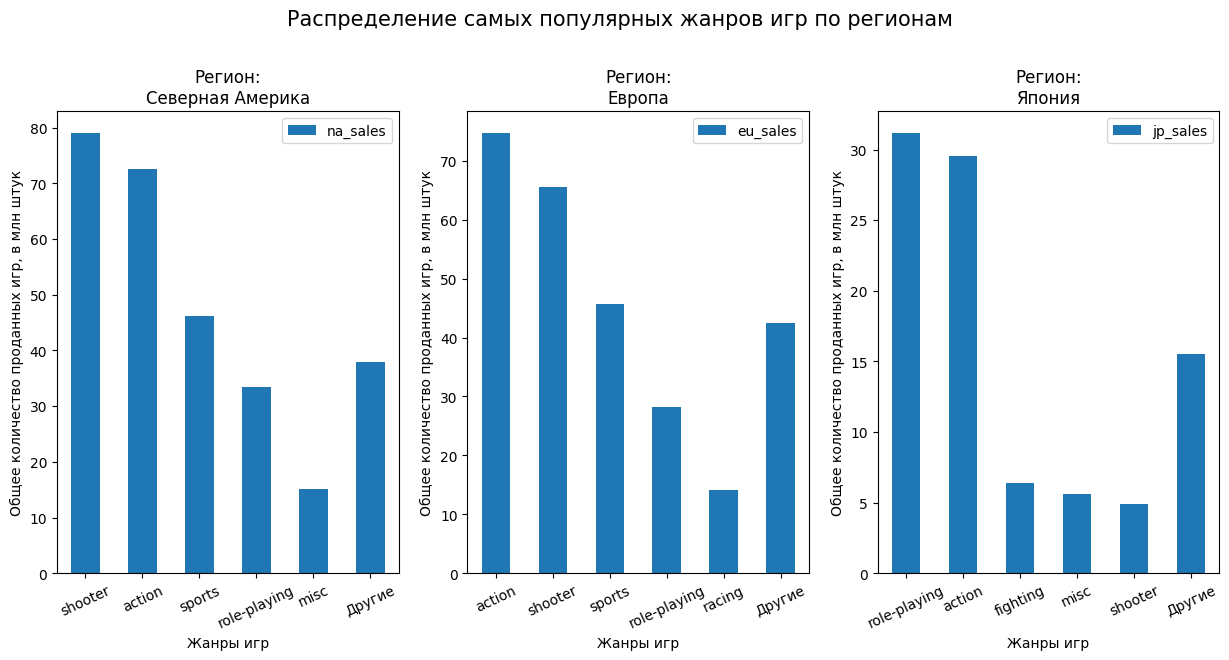

In [72]:
num = 0
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f'Распределение самых популярных жанров игр по регионам', y = 1.05, fontsize=15)
for region in data_relevant[user_region]:
    top_genres = (data_relevant.pivot_table(index='genre', values=region, aggfunc='sum')
                              .sort_values(by=region, ascending=False)
                              .head(5)).reset_index()
    
    other = data_relevant[region].sum() - top_genres[region].sum()
    all_genres = top_genres.append({'genre': 'Другие', region: other}, ignore_index=True)
    
    all_genres.plot(kind='bar', ax=ax[num], rot = 25)
    title = ('Северная Америка' if region == 'na_sales' 
             else ('Япония' if region == 'jp_sales'
                   else 'Европа'))   
    ax[num].set_xticklabels(all_genres['genre'])
    ax[num].set_title(f'Регион:\n{title}')
    ax[num].set_ylabel('Общее количество проданных игр, в млн штук')
    ax[num].set_xlabel('Жанры игр')
    num += 1

Ориентируясь на графики, также можно отметить закономерность и в жанровых предпочтениях пользователей СА и Европы. Лидерами для этих регионов являются жанры: 'Action', 'Shooter', 'Sports' и 'Role-Playing'. 5-ку для каждого региона замыкает свой характерный жанр: для Европы - 'Racing', а для СА - 'Misc' (сокращение от miscellaneous, означает "разное", "прочее"). У Японии 2 самых популярных жанра - 'Role-Playing' и 'Action', также там распространены 'Simulation', 'Misc' и 'Shooter'

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

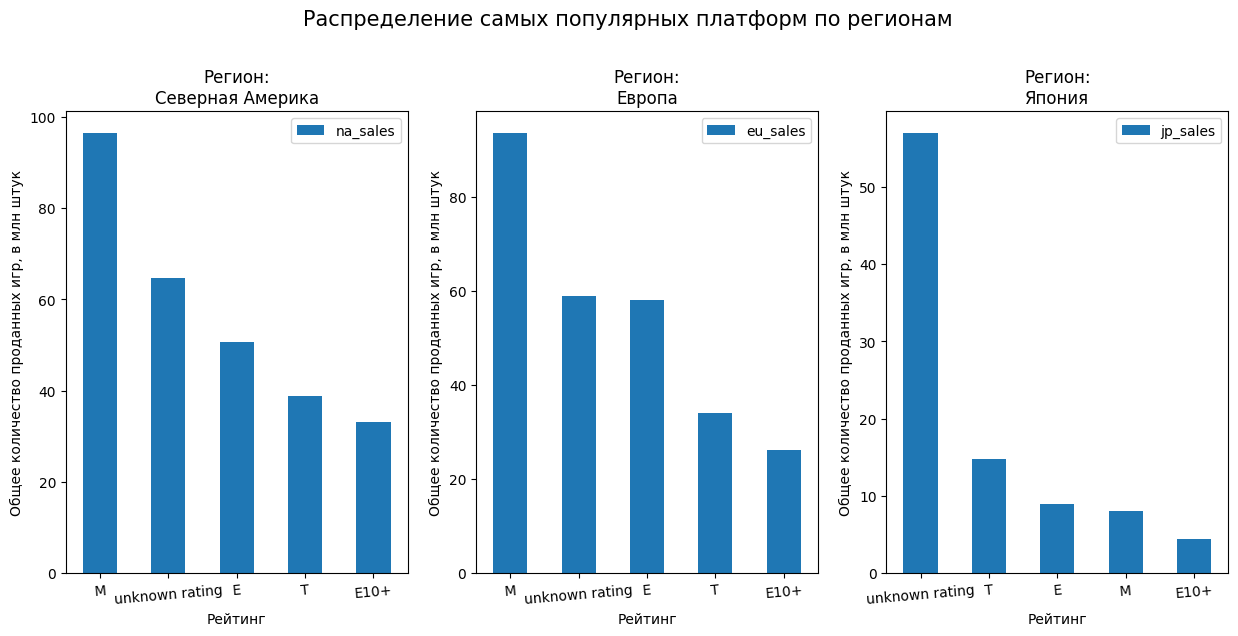

In [73]:
num = 0
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.suptitle(f'Распределение самых популярных платформ по регионам', y = 1.05, fontsize=15)
for region in data_relevant[user_region]:
    top_genres = (data_relevant.pivot_table(index='rating', values=region, aggfunc='sum')
                              .sort_values(by=region, ascending=False))
    
    top_genres.plot(kind='bar', ax=ax[num], rot = 5)
    title = ('Северная Америка' if region == 'na_sales' 
             else ('Япония' if region == 'jp_sales'
                   else 'Европа'))     
    ax[num].set_title(f'Регион:\n{title}')
    ax[num].set_ylabel('Общее количество проданных игр, в млн штук')
    ax[num].set_xlabel('Рейтинг')
    num += 1

Пропущенные значения мы заменили на 'unknown rating', так как большая часть данных с пропусками могла не учитываться и исказить результаты для данного вопроса.

Для СА И Европы большую часть занимают игры с рейтингом **M**, **E**, **T** и **E10+**. Как было отмечено выше [rating](#rating), у каждого региона своя организация, которая присваивает рейтинг, и мы видим, что для Японии именно такие игры занимают большую часть. Игры, рейтингованные ESRB не являются стимулирующим фактором для покупки, в данном случае для Японии


### Проверка гипотез

**Гипотезы:**

- **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**
- **Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

**Начнем с 1 гипотезы,**

воспользуемся Т-тестом для подтверждения гипотезы о равенстве средних двух генеральных совокупностей.

- H_0 - cредние пользовательские рейтинги платформ Xbox One и PC равны
- H_1 - cредние пользовательские рейтинги платформ Xbox One и PC различаются

Зададим p-value = 0.05

In [74]:
user_score_pc = data_relevant[(data_relevant['platform'] == 'PC') & 
                               (data_relevant['user_score'].isna() == False)]['user_score']
user_score_xone = data_relevant[(data_relevant['platform'] =='XOne') & 
                                 (data_relevant['user_score'].isna() == False)]['user_score']

In [75]:
results = st.ttest_ind(user_score_pc, user_score_xone, equal_var = False) 

alpha = 0.05 

print('p-значение: ', results.pvalue) 


if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.11601398086668835
Не получилось отвергнуть нулевую гипотезу


**Исходя из результатов, мы можем отметить сходство в пользовательских рейтингах для платформ `PC` и `XOne`**

**2 гипотеза:**

- H_0 - cредние пользовательские рейтинги жанров Action и Sports одинаковы
- H_1 - cредние пользовательские рейтинги жанров Action и Sports различаются

In [76]:
user_score__action = data_relevant[(data_relevant['genre'] == 'action') & 
                                    (data_relevant['user_score'].isna() == False)]['user_score']
user_score_sports = data_relevant[(data_relevant['genre'] =='sports') & 
                                   (data_relevant['user_score'].isna() == False)]['user_score']

In [77]:
results = st.ttest_ind(user_score__action, user_score_sports, equal_var = False) 

alpha = 0.05 

print('p-значение: ', results.pvalue) 


if results.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Исходя из результатов мы можем отвергнуть нулевую гипотезу о сходстве пользовательских рейтингах между жанрами 'Action' и 'Sports'**

### Общий вывод

Проведя полное исследование по данной теме, мы можем подытожить результаты:

**1) Реализацию игрового продукта рационально использовать для нынешнего поколения консолей и, в частности, PC.**

Список платформ:
- PS4
- XOne
- 3DS
- PC
- PSV
- WiiU
Предыдущее поколение консолей: **PS3**, **X360** являются также хорошим подспорьем по реализации игр, но они находятся на финальных стадиях "жизни"(медианное значение цикла жизни консолей - 10 лет, обе платформы появились в 2007 году); прекращение поддержки и обновлений от компании-производителя, а также прекращение выпуска новых игр на эти платформы - вопрос времени. Имеет смысл учитывать эти платформы 1-2 года до проведения нового исследования.

**2) Игры, получившие высокие оценки от критиков - имеют положительную тенденцию в виде большого количества проданных копий; оценки от пользователей мало влияют на продажи.**

**3) Список жанров игр, которые хорошо продаются:**
- Shooter
- Sports
- Platform
- Fighting
- Role-Playing	


**4) Учитывать портрет пользователя для каждого региона:**

**Северная Америка и Европа:**
- Платформы: **PS4, PS3, XOne, X360, 3DS, PC**
- Жанровые предпочтения: **Action, Shooter, Sports,	Role-Playing, Racing, Misc**

**Япония:**
- Платформы: **3DS, PSV, WiiU, PS4, PS3**
- Жанровые предпочтения: **Role-Playing, Action, Fighting, Misc, Shooter**

**5) Рейтинговые организации влияют на покупку внутри региона, в котором находятся**